#Trabalho prático # 3
##Introdução à Computação Numérica

###Tópico: Cálculo de zeros de funções

---

Nome: *(juan pedro perri barreto)*

DRE: *(122030755)*


---

**Instruções:**

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos**

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.  

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Faça o upload do arquivo .ipynb do trabalho no Google classroom (não serão aceito links, nem arquivos compartilhados).*

*Data de entrega: 30/outubro/2024*

---


## Tarefa #1:

 Desenvolver códigos, na forma de funções, que implementem os seguintes métodos:

a) Método da bissecção.

b) Método de Newton-Raphson.  

c) Método da secante.

Sugestão: implemente os métodos na forma de funções que devolvem na saída uma mensagem de erro ou o valor aproximado do zero procurado. Evite a possibilidade de laços infinitos considerando um número máximo de iterações como parâmetro de entrada.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from IPython.display import display, Latex

# Algoritmo de Bisseção
def bissecao(f, a, b, tolerancia=1e-15, max_interacao=1000):
    # Caso base
    if f(a) * f(b) >= 0:
        raise ValueError("A função deve ter sinais opostos em a e b")

    # Ponto médio
    for i in range(max_interacao):
        c = (a + b) / 2
        if abs(f(c)) < tolerancia or (b - a) / 2 < tolerancia:
            return c
        # Verifica qual sub-intervalo contém a raiz
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c

# Definição da função f(x)
def f(x):
    return x**4 - 5*x**2 + 2*x - 54

# Valores dos intervalos
a = 3
b = 4
raiz = bissecao(f, a, b)
print(f"A raiz aproximada é: {raiz}")

# Plotagem do gráfico da função e da raiz
x_vals = np.linspace(a - 1, b + 1, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = $x^4 - 5x^2 + 2x - 54$")
plt.axhline(0, color='gray', linestyle='--')  # linha y = 0
plt.scatter(raiz, f(raiz), color='red', zorder=5, label=f"Raiz aproximada: {raiz:.4f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico da função com a raiz aproximada pelo método da Bisseção")
plt.legend()
plt.grid(True)
plt.show()



Valor da raiz é: -3.2668


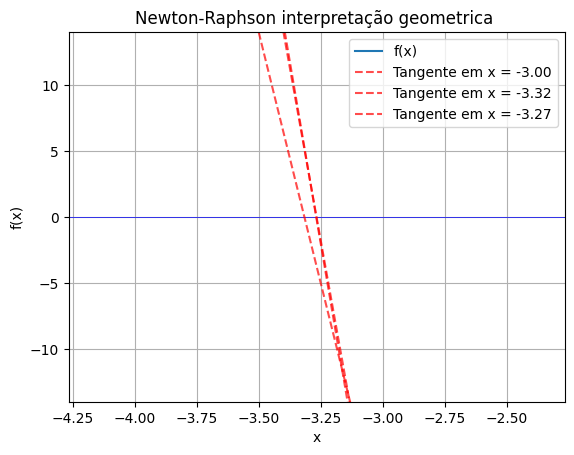

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 5*x**2 + 2*x - 54

def derivadafunc(x):
    return 4*x**3 - 10*x + 2

# Função para desenhar a reta tangente no ponto (x, y)
def reta_tangente(x, x0):
    return f(x0) + derivadafunc(x0) * (x - x0)

# Plot da função principal
xvalores = np.linspace(-3, 3, 400)
yvalores = f(xvalores)
plt.axhline(0, color="blue", linewidth=0.5)
plt.plot(xvalores, yvalores, label="f(x)")

# Método de Newton-Raphson com apenas três retas tangentes
def newtonraphson(x0):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001
    pontos_tangentes = []

    for i in range(max_iteracoes):
        derivada = derivadafunc(x)
        if abs(derivada) < 1e-15:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        # Adiciona o ponto atual à lista de pontos onde a reta tangente será desenhada
        if len(pontos_tangentes) < 3:
            pontos_tangentes.append(x)

        h = f(x) / derivada
        x = x - h  # Atualiza x

        if abs(h) < tolerancia:
            break

    raiz = x
    return raiz, pontos_tangentes

# Executa o método e encontra a raiz
x0 = -3  # Ponto inicial
raiz, pontos_tangentes = newtonraphson(x0)
print(f"Valor da raiz é: {raiz:.4f}")

# Desenha apenas três retas tangentes nos pontos especificados
for p in pontos_tangentes:
    x_tangente = np.linspace(p - 0.5, p + 0.5, 100)
    y_tangente = reta_tangente(x_tangente, p)
    plt.plot(x_tangente, y_tangente, linestyle="--", color="red", alpha=0.7, label=f"Tangente em x = {p:.2f}")

# Ajusta os limites dos eixos para fazer zoom na área de convergência
plt.xlim(raiz - 1, raiz + 1)
plt.ylim(-14, 14)

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson interpretação geometrica ")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a função para a qual queremos encontrar a raiz
def f(x):
    return x**4 - 5*x**2 + 2*x - 54

# Implementa o método da secante e armazena os pontos intermediários para plotar
def secante_plot(f, x0, x1, epsilon=1e-5, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [f(x0), f(x1)]

    for _ in range(N_max):
        if abs(f(x1)) < epsilon:
            break
        try:
            # Cálculo do próximo ponto pelo método da secante
            x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        # Armazena os pontos para plotar a secante
        pontos_x.append(x2)
        pontos_y.append(f(x2))

        # Verifica a condição de parada
        if abs(x2 - x1) < epsilon:
            break

        # Atualiza os pontos
        x0, x1 = x1, x2

    return pontos_x, pontos_y

# Pontos iniciais e chamada da função secante
x0, x1 = 0, 3  # Escolha inicial para encontrar a raiz em torno de x = 2
pontos_x, pontos_y = secante_plot(f, x0, x1)

# Preparação do gráfico
x_vals = np.linspace(-2, 4, 100)  # Intervalo para o eixo x
y_vals = f(x_vals)

# Plot da função
plt.plot(x_vals, y_vals, label="f(x) = x^4 - 5*x^2 + 2^x - 54", color="blue")
plt.axhline(0, color="black", linewidth=0.5)  # Linha y=0 para referência

# Plot das secantes em cada iteração
for i in range(1, len(pontos_x) - 1):
    x_sec = [pontos_x[i-1], pontos_x[i]]
    y_sec = [pontos_y[i-1], pontos_y[i]]
    plt.plot(x_sec, y_sec, "r--", label=f"Secante {i}" if i == 1 else "")

# Marcações dos pontos de cada iteração
plt.plot(pontos_x, pontos_y, 'ro', label="Pontos da Secante")

# Personalização do gráfico
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método da Secante")
plt.legend()
plt.grid()
plt.show()


## Tarefa #2:


a) A equação de van der Waals
           		$$\left(p+\frac{a}{v^2} \right)(v-b)=R T,$$

onde $p$ é a pressão, $v$ representa o volume molar, $a$ e $b$ são constantes empíricas que dependem do gás,  $R$ representa a constante universal dos gases e $T$ é a temperatura absoluta.
Determine os volumes molares do dióxido de carbono a uma temperatura  absoluta $T=300\,K$ e pressão de $1$, $10$ e $50\,atm$, respectivamente.
Os valores das constantes são $R=0.082054 \,L\, atm/(mol K)$, $a=3.592 \,L^2 atm/mol^2$ e $b=0.04267 L/mol$.

Use dois dos métodos implementados considerando uma tolerância $\varepsilon=5\cdot10^{-6}$ para o erro estimado.

b) Compare os resultados dos dois métodos usados, considerando os valores obtidos e a quantidade de iterações realizadas. Escreva suas observações no relatório.


Valor da raiz para P=1 (Newton-Raphson): 24.5126
Valor da raiz para P=1 (Secante): 24.5126
Valor da raiz para P=10 (Newton-Raphson): 2.3545
Valor da raiz para P=10 (Secante): 2.3545
Valor da raiz para P=50 (Newton-Raphson): 0.3584
Valor da raiz para P=50 (Secante): 0.3584


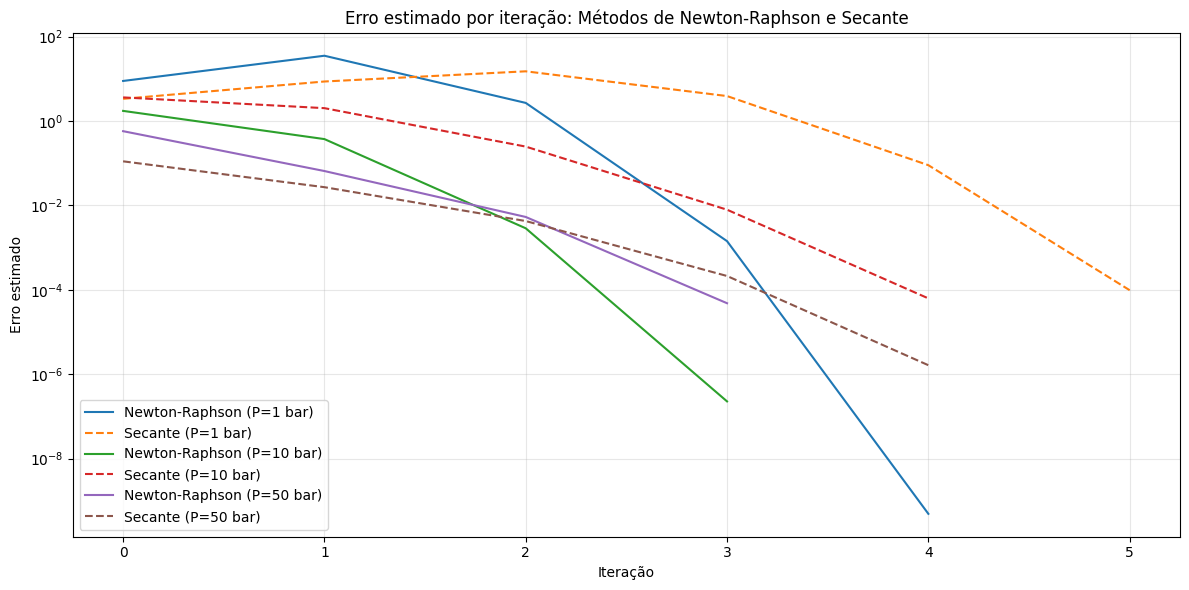

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
a = 3.592
b = 0.04267
R = 0.082054
T = 300

# Função de Van der Waals
def van_der_waals(v, P):
    return (P + a/v**2) * (v - b) - R*T

# Derivada da função de Van der Waals em relação a V_m
def derivadafunc(V_m, P):
    termo1 = P
    termo2 = -a/V_m**2
    termo3 = (2*a*b)/V_m**3
    derivada = termo1 + termo2 + termo3
    return derivada

# Método de Newton-Raphson com rastreamento de erro
def newtonraphson(x0, P):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001
    erros_nr = []
    for i in range(max_iteracoes):
        derivada = derivadafunc(x, P)
        if abs(derivada) < 5*10e-6:
            raise ValueError("A derivada é zero. O método não pode continuar.")
        h = van_der_waals(x, P) / derivada
        x_novo = x - h
        erro = abs(x_novo - x)
        erros_nr.append(erro)
        x = x_novo
        if erro < tolerancia:
            break
    return x, erros_nr

# Método da Secante com rastreamento de erro
def secante(x0, x1, P):
    max_iteracoes = 1000
    tolerancia = 0.0001
    erros_sec = []
    for i in range(max_iteracoes):
        f_x0 = van_der_waals(x0, P)
        f_x1 = van_der_waals(x1, P)
        if abs(f_x1 - f_x0) < 1e-10:
            raise ValueError("Divisão por zero na aproximação da secante.")
        x_novo = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        erro = abs(x_novo - x1)
        erros_sec.append(erro)
        if erro < tolerancia:
            break
        x0, x1 = x1, x_novo
    return x_novo, erros_sec

# Configuração do tamanho da figura
plt.figure(figsize=(12, 6))

# Valores iniciais e lista de pressões
x0 = 1
x1 = 0.5
pressao_lista = [1, 10, 50]

# Execução dos métodos e plot do erro para cada valor de pressão
for P in pressao_lista:
    try:
        # Calcula a raiz e o erro para Newton-Raphson
        raiz_nr, erros_nr = newtonraphson(x0, P)
        # Calcula a raiz e o erro para o método da Secante
        raiz_sec, erros_sec = secante(x0, x1, P)

        # Plot dos erros
        plt.plot(range(len(erros_nr)), erros_nr, label=f"Newton-Raphson (P={P} bar)")
        plt.plot(range(len(erros_sec)), erros_sec, linestyle="--", label=f"Secante (P={P} bar)")

        print(f"Valor da raiz para P={P} (Newton-Raphson): {raiz_nr:.4f}")
        print(f"Valor da raiz para P={P} (Secante): {raiz_sec:.4f}")

    except ValueError as e:
        print(f"Erro para P={P}: {e}")

# Configurações do gráfico de erro
plt.yscale('log')  # Escala logarítmica para visualizar melhor a convergência
plt.xlabel("Iteração")
plt.ylabel("Erro estimado")
plt.title("Erro estimado por iteração: Métodos de Newton-Raphson e Secante")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Função para gerar a tabela de resultados
def gerar_tabela_resultados(x0, x1, pressao_lista):
    # Listas para armazenar os resultados
    resultados = {
        "Pressão (P)": [],
        "Método": [],
        "Raiz Aproximada": [],
        "Iterações": []
    }

    # Execução dos métodos e armazenamento dos resultados na tabela
    for P in pressao_lista:
        try:
            # Método de Newton-Raphson
            raiz_nr, erros_nr = newtonraphson(x0, P)
            resultados["Pressão (P)"].append(P)
            resultados["Método"].append("Newton-Raphson")
            resultados["Raiz Aproximada"].append(raiz_nr)
            resultados["Iterações"].append(len(erros_nr))

            # Método da Secante
            raiz_sec, erros_sec = secante(x0, x1, P)
            resultados["Pressão (P)"].append(P)
            resultados["Método"].append("Secante")
            resultados["Raiz Aproximada"].append(raiz_sec)
            resultados["Iterações"].append(len(erros_sec))

        except ValueError as e:
            print(f"Erro para P={P}: {e}")

    # Criação da tabela com pandas
    tabela = pd.DataFrame(resultados)
    return tabela

# Valores iniciais e lista de pressões
x0 = 1
x1 = 0.5
pressao_lista = [1, 10, 50]

# Gera e exibe a tabela
tabela_resultados = gerar_tabela_resultados(x0, x1, pressao_lista)
print(tabela_resultados)


   Pressão (P)          Método  Raiz Aproximada  Iterações
0            1  Newton-Raphson        24.512588          5
1            1         Secante        24.512588          6
2           10  Newton-Raphson         2.354496          4
3           10         Secante         2.354496          5
4           50  Newton-Raphson         0.358421          4
5           50         Secante         0.358421          5


##Tarefa #3:  

Observe que o número $\pi$ é um zero das funções:

i) $f(x)= \cos(x)+1$

ii) $f(x)= \mathrm{sen}(x)$

a) Use sua implementação do método de Newton-Raphson para obter aproximações do número $\pi$ considerando as funções acima e uma tolerância $\varepsilon =10^{-15}$ para o erro estimado. Considere o chute iniciais $x_0=3$.


a) Use sua implementação do método da secante para obter aproximações do número $\pi$ considerando as funções acima e uma tolerância $\varepsilon =10^{-15}$ para o erro estimado. Use os chutes iniciais $x_0=3$ para e $x_1=3.2$

c) Compare os resultados dos itens a) e b), considerando os erros das aproximações obtidas com relação ao valor "exato" de $\pi$ dado pelo Python no módulo math e a quantidade de iterações efetuadas. Escreva suas observações no relatório e explique o que foi observado.


item a newton-raphson

Valor da raiz é: 3.1415


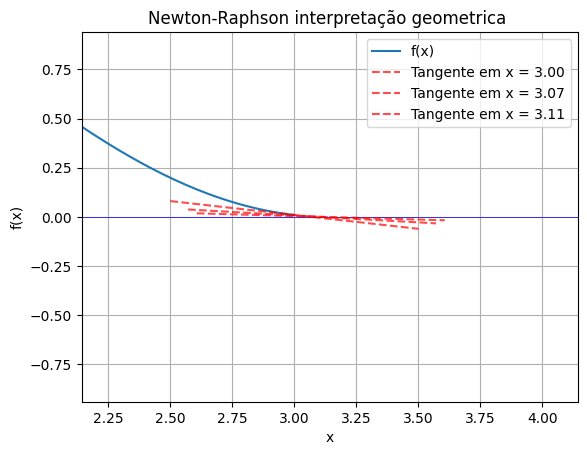

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.cos(x)+1

def derivadafunc(x):
    return -np.sin(x)

# Função para desenhar a reta tangente no ponto (x, y)
def reta_tangente(x, x0):
    return f(x0) + derivadafunc(x0) * (x - x0)

# Plot da função principal
xvalores = np.linspace(-3, 3, 400)
yvalores = f(xvalores)
plt.axhline(0, color="blue", linewidth=0.5)
plt.plot(xvalores, yvalores, label="f(x)")

# Método de Newton-Raphson com apenas três retas tangentes
def newtonraphson(x0):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001
    pontos_tangentes = []

    for i in range(max_iteracoes):
        derivada = derivadafunc(x)
        if abs(derivada) < 1e-15:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        # Adiciona o ponto atual à lista de pontos onde a reta tangente será desenhada
        if len(pontos_tangentes) < 3:
            pontos_tangentes.append(x)

        h = f(x) / derivada
        x = x - h  # Atualiza x

        if abs(h) < tolerancia:
            break

    raiz = x
    return raiz, pontos_tangentes

# Executa o método e encontra a raiz
x0 = 3  # Ponto inicial
raiz, pontos_tangentes = newtonraphson(x0)
print(f"Valor da raiz é: {raiz:.4f}")

# Desenha apenas três retas tangentes nos pontos especificados
for p in pontos_tangentes:
    x_tangente = np.linspace(p - 0.5, p + 0.5, 100)
    y_tangente = reta_tangente(x_tangente, p)
    plt.plot(x_tangente, y_tangente, linestyle="--", color="red", alpha=0.7, label=f"Tangente em x = {p:.2f}")

# Ajusta os limites dos eixos para fazer zoom na área de convergência
plt.xlim(raiz - 1, raiz + 1)
plt.ylim(-0.94, 0.94)

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson interpretação geometrica ")
plt.grid(True)
plt.show()


item a metodo da secante

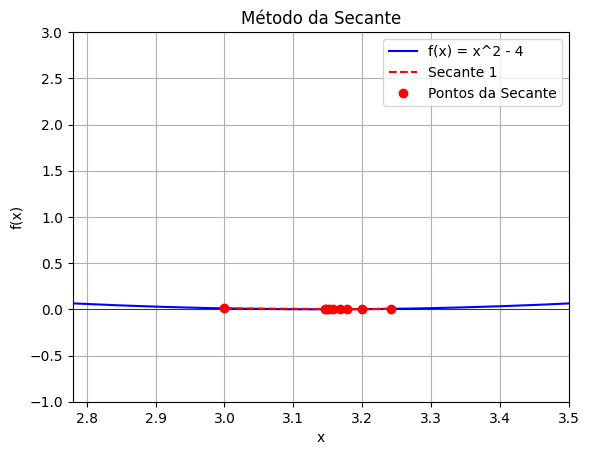

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a função para a qual queremos encontrar a raiz
def f(x):
    return np.cos(x)+1

# Implementa o método da secante e armazena os pontos intermediários para plotar
def secante_plot(f, x0, x1, epsilon=1e-5, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [f(x0), f(x1)]

    for _ in range(N_max):
        if abs(f(x1)) < epsilon:
            break
        try:
            # Cálculo do próximo ponto pelo método da secante
            x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        # Armazena os pontos para plotar a secante
        pontos_x.append(x2)
        pontos_y.append(f(x2))

        # Verifica a condição de parada
        if abs(x2 - x1) < epsilon:
            break

        # Atualiza os pontos
        x0, x1 = x1, x2

    return pontos_x, pontos_y

# Pontos iniciais e chamada da função secante
x0, x1 = 3, 3.2  # Escolha inicial para encontrar a raiz em torno de x = 2
pontos_x, pontos_y = secante_plot(f, x0, x1)

# Preparação do gráfico
x_vals = np.linspace(-2, 4, 100)  # Intervalo para o eixo x
y_vals = f(x_vals)

# Plot da função
plt.plot(x_vals, y_vals, label="f(x) = x^2 - 4", color="blue")
plt.axhline(0, color="black", linewidth=0.5)  # Linha y=0 para referência

# Plot das secantes em cada iteração
for i in range(1, len(pontos_x) - 1):
    x_sec = [pontos_x[i-1], pontos_x[i]]
    y_sec = [pontos_y[i-1], pontos_y[i]]
    plt.plot(x_sec, y_sec, "r--", label=f"Secante {i}" if i == 1 else "")

# Marcações dos pontos de cada iteração
plt.plot(pontos_x, pontos_y, 'ro', label="Pontos da Secante")

#zoom no grafico para a parte da raiz

plt.xlim(2.78,3.5)
plt.ylim(-1,3)


# Personalização do gráfico
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método da Secante")
plt.legend()
plt.grid()
plt.show()

item b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define a função para a qual queremos encontrar a raiz
def f(x):
    return np.cos(x)+1

def derivadafunc(x):
    return -np.sin(x)


def newtonraphson(x0):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001
    pontos_tangentes = []

    for i in range(max_iteracoes):
        derivada = derivadafunc(x)
        if abs(derivada) < 1e-15:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        # Adiciona o ponto atual à lista de pontos onde a reta tangente será desenhada
        if len(pontos_tangentes) < 3:
            pontos_tangentes.append(x)

        h = f(x) / derivada
        x = x - h  # Atualiza x

        if abs(h) < tolerancia:
            break

    raiz = x
    return raiz, pontos_tangentes

# Executa o método e encontra a raiz
x0 = 3  # Ponto inicial
raiz, pontos_tangentes = newtonraphson(x0)
print(f"Valor da raiz é: {raiz:.4f}")

def secante_plot(f, x0, x1, epsilon=1e-5, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [f(x0), f(x1)]

    for _ in range(N_max):
        if abs(f(x1)) < epsilon:
            break
        try:
            # Cálculo do próximo ponto pelo método da secante
            x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        # Armazena os pontos para plotar a secante
        pontos_x.append(x2)
        pontos_y.append(f(x2))

        # Verifica a condição de parada
        if abs(x2 - x1) < epsilon:
            break

        # Atualiza os pontos
        x0, x1 = x1, x2

    return pontos_x, pontos_y





In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

def format_table_comparison(f, df_secante, df_newton):
    """
    Formata e estiliza a tabela de comparação dos métodos numéricos
    """

    pd.set_option('display.precision', 8)
    pd.set_option('display.float_format', lambda x: '%.8f' % x)


    comparison_data = {
        'Método': ['Secante', 'Newton-Raphson'],
        'Iterações': [len(df_secante), len(df_newton)],
        'Valor Final': [df_secante['x'].iloc[-1], df_newton['x'].iloc[-1]],
        'Erro Final': [df_secante['erro'].iloc[-1], df_newton['erro'].iloc[-1]],
        'Tempo (ms)': [df_secante['tempo'].iloc[-1], df_newton['tempo'].iloc[-1]]
    }

    comparison_df = pd.DataFrame(comparison_data)

    # Aplicando estilo à tabela
    styled_df = comparison_df.style\
        .format({
            'Valor Final': '{:.8f}',
            'Erro Final': '{:.2e}',
            'Tempo (ms)': '{:.3f}'
        })\
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid black',
            'padding': '8px'
        })\
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', '#f2f2f2'),
                      ('text-align', 'center'),
                      ('font-weight', 'bold'),
                      ('border', '1px solid black'),
                      ('padding', '8px')]},
        ])

    return styled_df

def create_iteration_table(df, method_name):
    """
    Cria uma tabela detalhada para cada iteração do método
    """
    styled_df = df.style\
        .format({
            'x': '{:.8f}',
            'f(x)': '{:.2e}',
            'erro': '{:.2e}',
            'tempo': '{:.3f}'
        })\
        .set_caption(f'Detalhamento das Iterações - Método {method_name}')\
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid black',
            'padding': '5px'
        })\
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', '#f2f2f2'),
                      ('text-align', 'center'),
                      ('font-weight', 'bold'),
                      ('border', '1px solid black'),
                      ('padding', '5px')]},
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                      ('font-weight', 'bold'),
                      ('font-size', '14px'),
                      ('padding', '8px')]}
        ])

    return styled_df


def secante_plot(f, x0, x1, tol=1e-8, max_iter=100):
    """
    Implementação do método da secante com registro de dados para plotagem
    """
    import time

    data = []
    start_time = time.time()

    x_ant = x0
    x_atual = x1

    for i in range(max_iter):
        f_x_ant = f(x_ant)
        f_x_atual = f(x_atual)

        if abs(f_x_atual) < tol:
            break

        x_novo = x_atual - f_x_atual * (x_atual - x_ant) / (f_x_atual - f_x_ant)
        erro = abs(x_novo - x_atual)

        current_time = (time.time() - start_time) * 1000  # tempo em millisegundos

        data.append({
            'iteracao': i,
            'x': x_novo,
            'f(x)': f_x_atual,
            'erro': erro,
            'tempo': current_time
        })

        x_ant = x_atual
        x_atual = x_novo

    return pd.DataFrame(data)

def newtonraphson(f, df, x0, tol=1e-8, max_iter=100):
    """
    Implementação do método de Newton-Raphson com registro de dados para plotagem
    """
    import time

    data = []
    start_time = time.time()

    x = x0

    for i in range(max_iter):
        f_x = f(x)
        df_x = df(x)

        if abs(f_x) < tol:
            break

        x_novo = x - f_x/df_x
        erro = abs(x_novo - x)

        current_time = (time.time() - start_time) * 1000  # tempo em millisegundos

        data.append({
            'iteracao': i,
            'x': x_novo,
            'f(x)': f_x,
            'erro': erro,
            'tempo': current_time
        })

        x = x_novo

    return pd.DataFrame(data)

# Exemplo de função para teste
def f(x):
    return np.cos(x)+1

def df(x):
    return -np.sin(x)

# Execução dos métodos
x0_secante, x1_secante = 3, 3.2
df_secante = secante_plot(f, x0_secante, x1_secante)

x0_newton = 3
df_newton = newtonraphson(f, df, x0_newton)

# Criação das tabelas
comparison_table = format_table_comparison(f, df_secante, df_newton)
secante_details = create_iteration_table(df_secante, "Secante")
newton_details = create_iteration_table(df_newton, "Newton-Raphson")

# Exibição das tabelas
display(HTML("<h3>Comparação dos Métodos</h3>"))
display(comparison_table)
display(HTML("<br><h3>Detalhamento das Iterações</h3>"))
display(secante_details)
display(newton_details)

,Método,Iterações,Valor Final,Erro Final,Tempo (ms)
0,Secante,14,3.14172112,7.94e-05,0.093
1,Newton-Raphson,10,3.14145469,1.38e-04,0.046


,iteracao,x,f(x),erro,tempo
0,0,3.24107846,1.71e-03,4.11e-02,0.049
1,1,3.17837630,4.94e-03,6.27e-02,0.055
2,2,3.16843898,6.76e-04,9.94e-03,0.059
3,3,3.15711088,3.60e-04,1.13e-02,0.062
4,4,3.15142618,1.20e-04,5.68e-03,0.065
5,5,3.14761184,4.83e-05,3.81e-03,0.068
6,6,3.14532637,1.81e-05,2.29e-03,0.070
7,7,3.14389698,6.97e-06,1.43e-03,0.073
8,8,3.14301757,2.65e-06,8.79e-04,0.076
9,9,3.14247312,1.02e-06,5.44e-04,0.082


,iteracao,x,f(x),erro,tempo
0,0,3.07091484,1.00e-02,7.09e-02,0.018
1,1,3.10626847,2.50e-03,3.54e-02,0.024
2,2,3.12393240,6.24e-04,1.77e-02,0.028
3,3,3.13276275,1.56e-04,8.83e-03,0.030
4,4,3.13717773,3.90e-05,4.41e-03,0.033
5,5,3.13938520,9.75e-06,2.21e-03,0.036
6,6,3.14048893,2.44e-06,1.10e-03,0.038
7,7,3.14104079,6.09e-07,5.52e-04,0.041
8,8,3.14131672,1.52e-07,2.76e-04,0.043
9,9,3.14145469,3.81e-08,1.38e-04,0.046


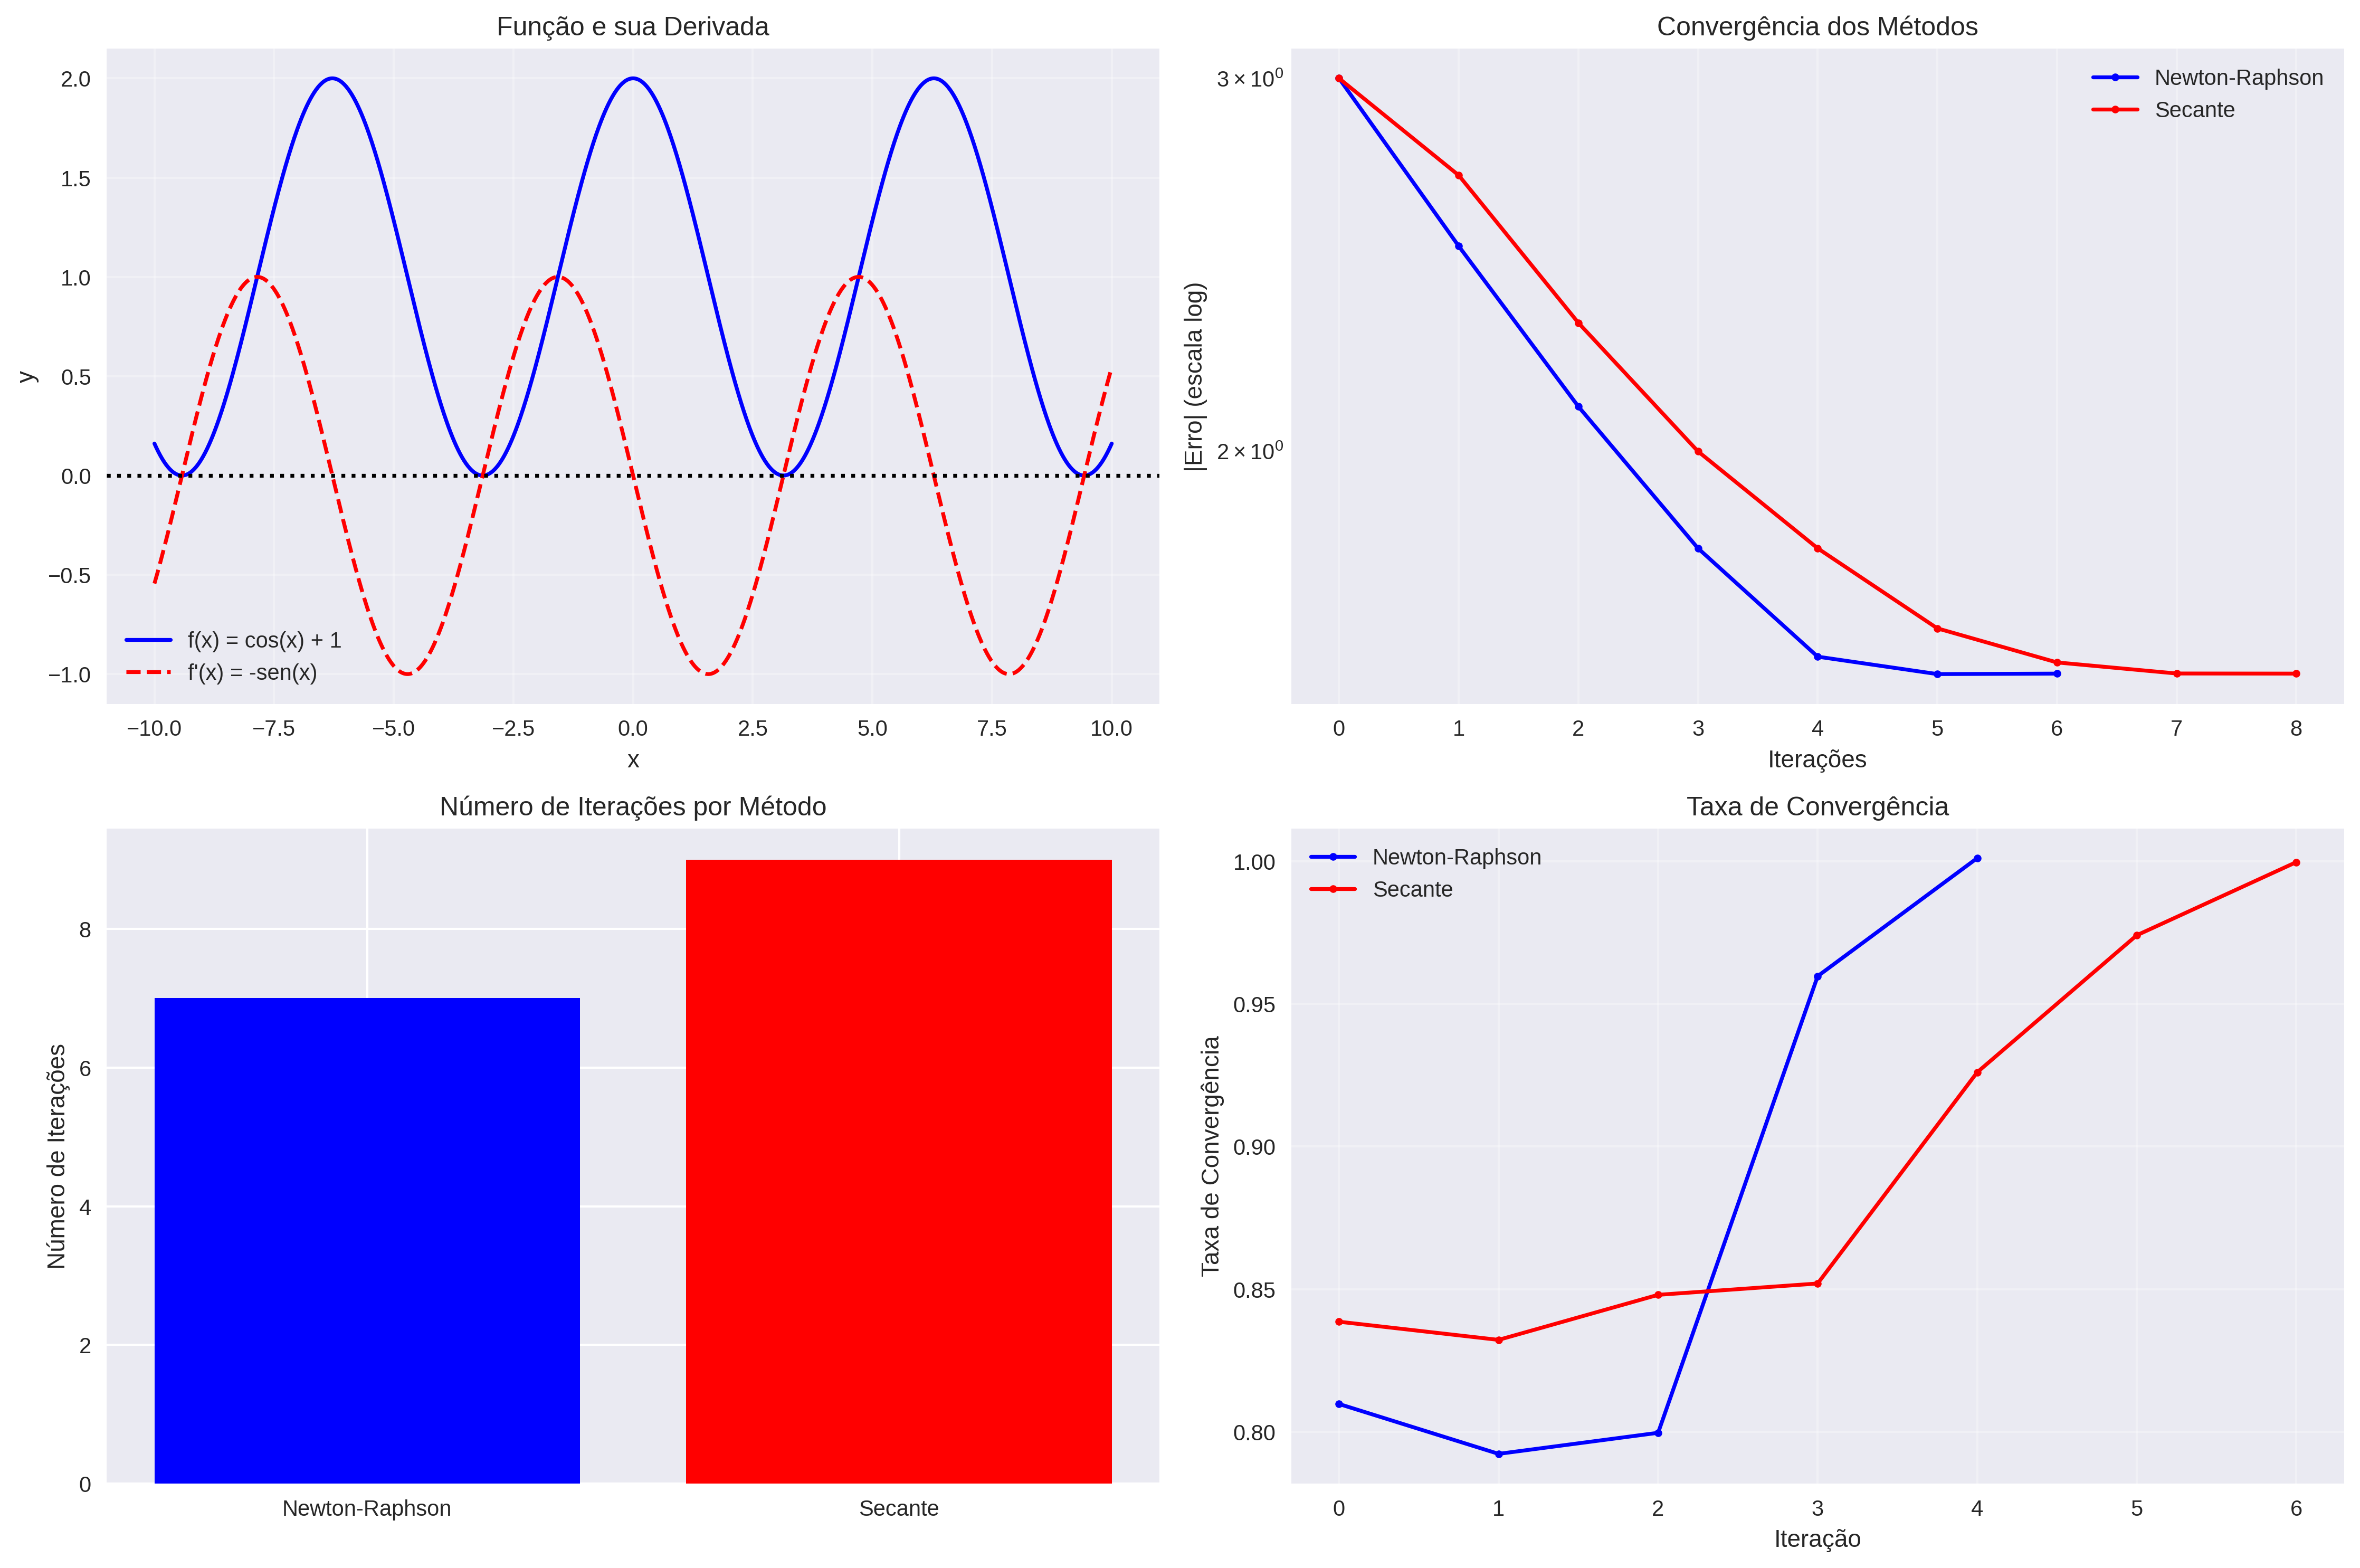

## Relatório

1a- O metodo da bisseção
usando a equação : $c = \frac{a + b}{2}$ queremos com dois pontos que vão ser definidos nesse caso o intervalo de [a,b], em que vamos fazer divisoes sucessivas ate termos um valor de uma raiz aproximada ou no caso limitamos para 1000, para que não ocorra um loop infinito.


1b- metodo de newthon-raphson
O método de Newton-Raphson usando a formula : $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ utiliza a derivada da função para encontrar a raiz. Começamos com um ponto inicial e calculamos a próxima aproximação usando a tangente da curva. Este método tende a convergir rapidamente, especialmente quando estamos próximos da raiz.


1c - metodo da secante
sua definição pela a formula : $x_{n+1} = x_n - \frac{f(x_n)(x_n - x_{n-1})}{f(x_n) - f(x_{n-1})}$ em que se utiliza dois pontos iniciais em um intervalo definido
[
𝑎
,
𝑏
]
. A ideia é fazer divisões sucessivas entre esses pontos até encontrarmos um valor aproximado da raiz da função. A cada iteração, calculamos um novo ponto usando a fórmula da secante, que se baseia nos valores da função nos dois pontos. Continuamos esse processo até que a raiz seja encontrada ou até 1000 iterações, para evitar um loop infinito.



2 - os dois geram os mesmos valores e aproximam as mesmas raizes, mas um ponto interessante que quero citar sobre a performace de newton-raphson foi melhor que o metodo da secante mesmo sendo citado que o algoritimo tem um grande problema, a parte de derivação mas o caso especifico que ele funciona melhor quando usamos valores quadraticos ou proximos da raiz, coisa que nossa equação faz e por isso temos essa surpresa, tinha feito essa comparação usando equaçãoes de graus maiores e a secante se saiu melhor, mas para esse caso o melhor metodo foi o de newton-raphson


3 - Na analise que eu quero acentuar esta sendo a melhor performace visto que como no caso anterior so que temos uma melhor performace no metodo de newton pois temos uma eq que esta proxima a raiz e sua derivada e simples para o calculo ou seja a eficiencia computacional para o calculo da derivada, com esse comportamente dessa função trigonometrica simples temos um menor numero de interações, melhor controle de erro e uma melhor convergencia para achar a raiz.